In [ ]:
import pandas as pd

In [ ]:

sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fear_greed_index.csv')
trader = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/historical_data.csv')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


### Column Types

- **Numerical** - timestamp , value
- **Categorical** - classification , date


### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

In [ ]:
sentiment['classification'].describe()

,classification
count,2644
unique,5
top,Fear
freq,781


<Axes: xlabel='classification'>

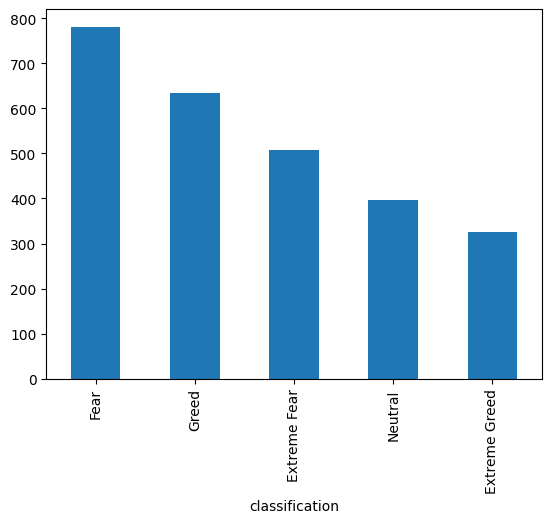

In [ ]:
sentiment['classification'].value_counts().plot(kind='bar')

In [ ]:
trader.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,98019.000000,98019.000000,98019.000000,9.801900e+04,98019.000000,9.801900e+04,98019.000000,9.801900e+04,9.801900e+04
mean,21.326775,72.320284,459.926485,7.891116e+03,1.023430,7.043354e+10,0.092347,5.629212e+14,1.738131e+12
std,33.330952,127.151973,521.466436,1.340313e+05,2.650596,1.517598e+10,0.142308,3.262988e+14,7.024778e+09
min,0.000005,0.000110,0.000000,-9.317093e+06,-7.492000,4.802247e+09,-0.043605,0.000000e+00,1.700000e+12
25%,4.934000,7.270000,74.790000,-6.754100e+02,0.000000,6.049226e+10,0.006389,2.800000e+14,1.740000e+12
50%,16.050000,24.910000,254.470000,1.092092e+03,0.000000,7.440115e+10,0.031202,5.630000e+14,1.740000e+12
75%,22.722000,71.695000,593.710000,1.304777e+04,0.699348,8.139619e+10,0.117342,8.470000e+14,1.740000e+12
max,246.630000,744.300000,2265.100000,6.269434e+06,12.489765,9.014245e+10,0.791810,1.130000e+15,1.750000e+12


In [ ]:
trader['Coin'].describe()

,Coin
count,211224
unique,246
top,HYPE
freq,68005


In [ ]:
trader['Coin'].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


In [ ]:
import pandas as pd

Q1 = trader['Execution Price'].quantile(0.25)
Q3 = trader['Execution Price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
trader = trader[(trader['Execution Price']>= lower_bound) & (trader['Execution Price'] <= upper_bound)]


In [ ]:
trader['Execution Price'].describe()

,Execution Price
count,169037.000000
mean,22.084332
std,37.162754
min,0.000005
25%,2.196900
50%,14.866000
75%,22.722000
max,246.630000


<Axes: ylabel='Density'>

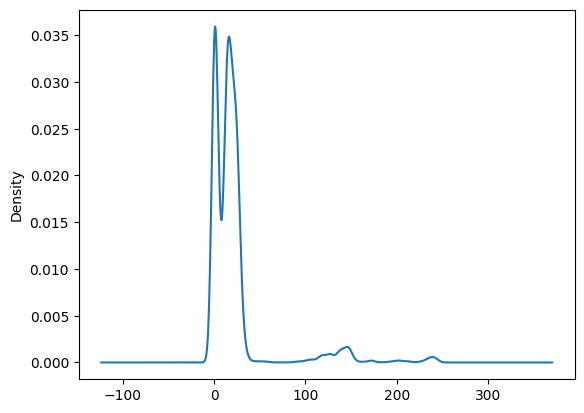

In [ ]:
trader['Execution Price'].plot(kind='kde')

1. Major peak near 0 suggests most executions are extremely fast (likely under a few milliseconds).
2. Right tail with small bumps between 50,000 to 120,000 indicates multiple outliers or occasional long-running executions.
3.These could be due to heavy computation, API delays, or network latency in some cases.

<Axes: xlabel='Execution Price'>

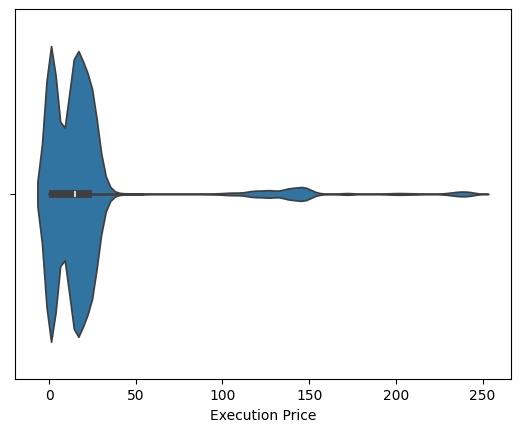

In [ ]:
sns.violinplot(x=trader['Execution Price'])


Main Cluster at Low Prices (0–10,000 range)
*   Execution price ka majority portion lower end me concentrated hai.
*  Most executions low price range me ho rahe hain — yeh dikhata hai ki data heavily left-skewed hai.

Thin Middle (10,000–70,000)

*   Is range me violin almost invisible hai → very few or no executions.

Two Smaller Peaks Around 85,000 & 100,000

*   Yahan par secondary clusters hain — ho sakta hai specific coins, assets, ya market conditions ne yeh prices produce kiye ho.










In [ ]:
trader['Execution Price'].mean()

np.float64(22.084332460240304)

<Axes: >

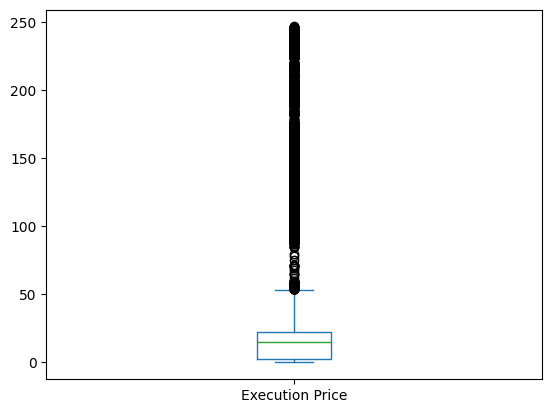

In [ ]:
trader['Execution Price'].plot(kind='box')

In [ ]:
trader['Execution Price'].value_counts()


,count
Execution Price,
13.050000,415
0.590000,398
25.200000,351
25.420000,336
13.250000,327
...,...
0.045436,1
0.045500,1
150.560000,1


1. Number of Trades: 104,865 executions, indicating high trading activity.

2. Central Tendency: The mean execution price is $29.95, while the median (50%) is much lower at $17.58—signaling right skewness.
3. Standard deviation: $53.83, which is large relative to the mean and median.

4. Minimum price: extremely close to zero ($0.000005).

5. Maximum price: $463.70, far above both the mean and median.

6. 75% of executions are below $24.26, but the maximum is nearly 20 times higher, confirming the presence of significant outliers.

7. Density Plot: Shows a sharp peak at very low prices with an extended right tail, indicating most trades occur at low prices but a few have extremely high execution prices.

8. Violin Plot: Confirms the data is heavily right-skewed. The majority of trades are tightly clustered near low prices, but there are visible outlier bumps further out, emphasizing rare but large transactions.

In [ ]:
# univarilate analysis of size token and size

In [ ]:
trader['Size Tokens'].describe()

,Size Tokens
count,1.690370e+05
mean,5.776795e+03
std,1.165322e+05
min,1.100000e-04
25%,1.500000e+01
50%,5.980000e+01
75%,3.068000e+02
max,1.582244e+07


<Axes: ylabel='Frequency'>

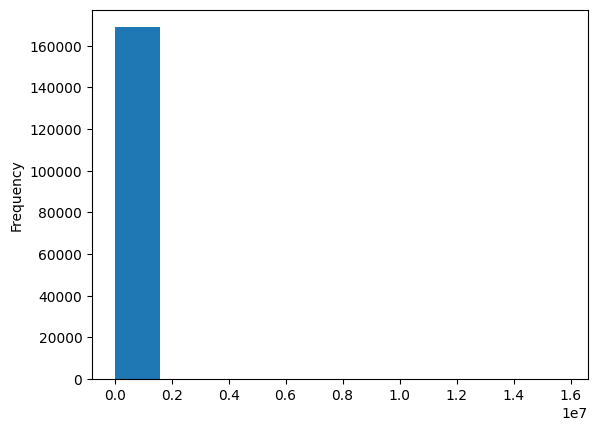

In [ ]:
trader['Size Tokens'].plot(kind='hist')

<Axes: ylabel='Density'>

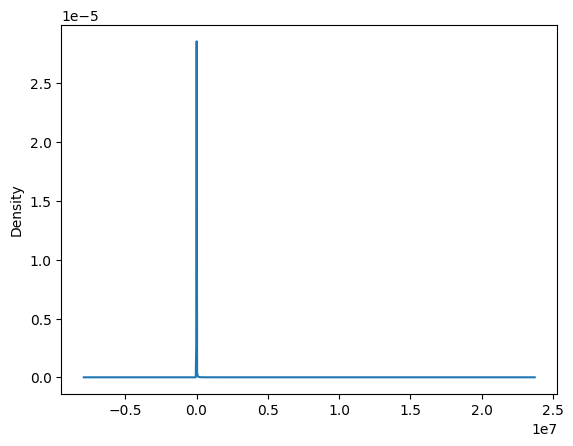

In [ ]:
trader['Size Tokens'].plot(kind='kde')

<Axes: >

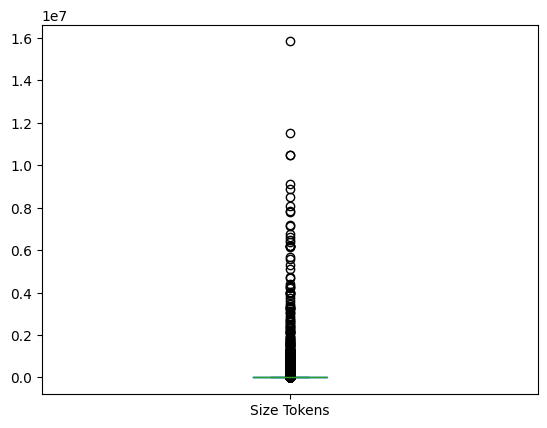

In [ ]:
trader['Size Tokens'].plot(kind='box')

###
insights


*   Heavily Right-Skewed Distribution.
*   75% of your data is below 200 tokens, but max is 15.8 million → This inflates the mean (~4,600) significantly.
*   mean is misleading because a few extreme values are pulling it up.
*   Median (~32) and 75th percentile (~188) are more representative of normal data.





##
Your data mostly consists of small token sizes, but a few extreme outliers are heavily distorting the stats and visualizations
##

In [ ]:
import pandas as pd

Q1 = trader['Size Tokens'].quantile(0.25)
Q3 = trader['Size Tokens'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
trader = trader[(trader['Size Tokens'] >= lower_bound) & (trader['Size Tokens'] <= upper_bound)]


<Axes: >

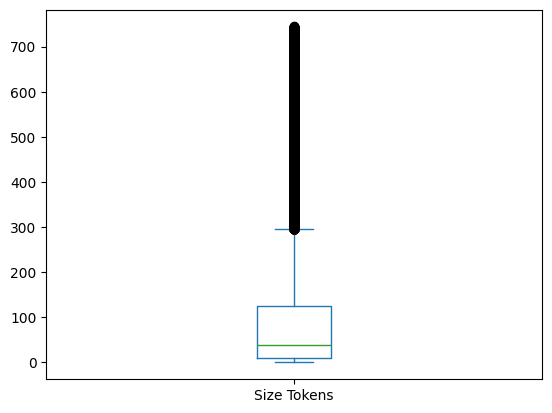

In [ ]:
trader['Size Tokens'].plot(kind='box')

In [ ]:
trader['Size Tokens'].describe()

,Size Tokens
count,141632.000000
mean,104.229756
std,150.691528
min,0.000110
25%,10.687500
50%,38.780000
75%,124.770000
max,744.500000


### closed PnL
###

In [ ]:
trader['Closed PnL'].describe()

,Closed PnL
count,141632.000000
mean,31.506084
std,338.794583
min,-8181.406929
25%,0.000000
50%,0.000000
75%,4.996172
max,42854.742790


<Axes: ylabel='Frequency'>

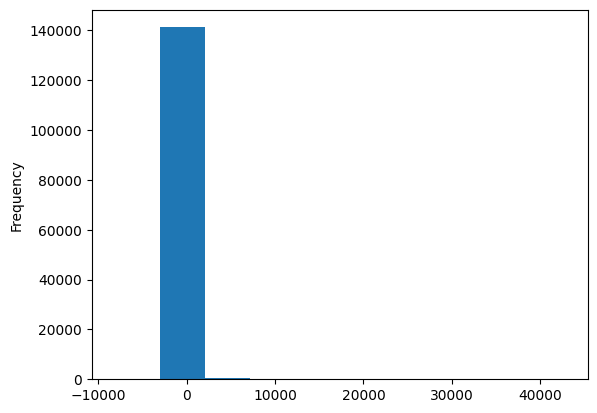

In [ ]:
trader['Closed PnL'].plot(kind='hist')

<Axes: ylabel='Density'>

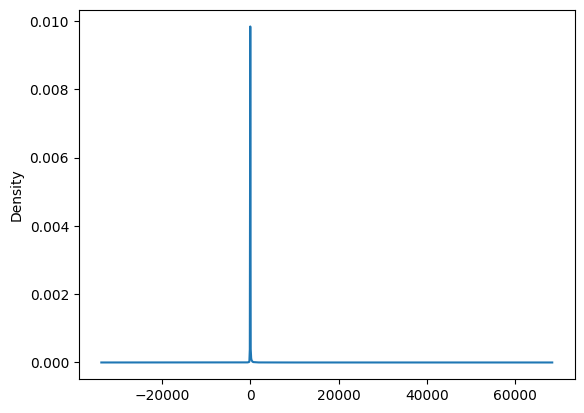

In [ ]:
trader['Closed PnL'].plot(kind='kde')

<Axes: >

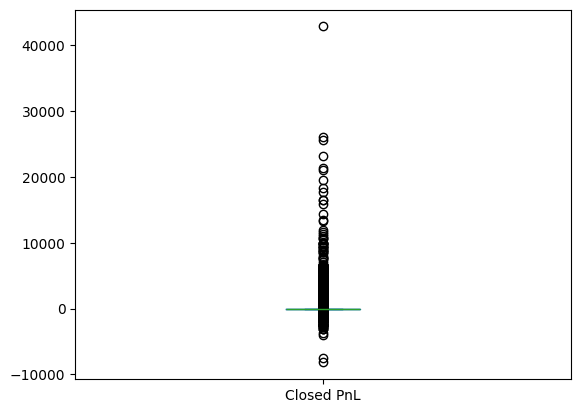

In [ ]:
trader['Closed PnL'].plot(kind='box')

in Closed PnL column there are lot of outliers so we have to do feature engineering then we will find insights

In [ ]:
import pandas as pd

Q1 = trader['Closed PnL'].quantile(0.25)
Q3 = trader['Closed PnL'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
trader = trader[(trader['Closed PnL']>= lower_bound) & (trader['Closed PnL'] <= upper_bound)]


<Axes: >

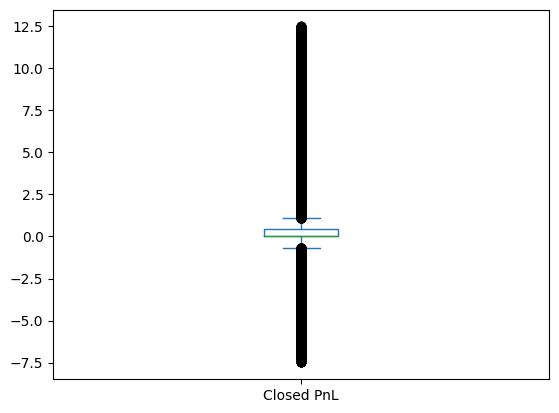

In [ ]:
trader['Closed PnL'].plot(kind='box')

In [ ]:
trader['Closed PnL'].describe()

,Closed PnL
count,110414.000000
mean,0.966266
std,2.604995
min,-7.492000
25%,0.000000
50%,0.000000
75%,0.450821
max,12.489765


<Axes: ylabel='Frequency'>

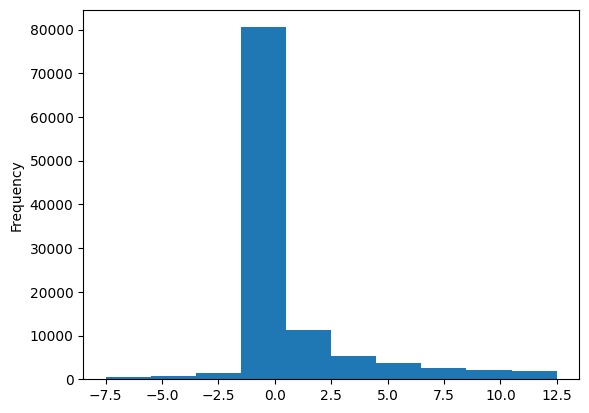

In [ ]:
trader['Closed PnL'].plot(kind='hist')

<Axes: ylabel='Density'>

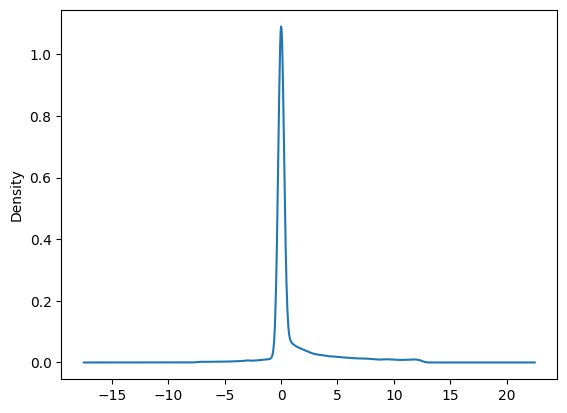

In [ ]:
trader['Closed PnL'].plot(kind='kde')

Heavily right-skewed distribution (mean > median)

50%+ trades had 0 PnL → maybe breakeven or fees removed profit

Some trades have high gains → max ~10.7

Some trades have deep losses → min ~-6.4



In [ ]:
trader['Size USD'].describe()

,Size USD
count,110414.000000
mean,1262.098627
std,4302.847263
min,0.000000
25%,98.790000
50%,347.080000
75%,965.327500
max,156962.300000


<Axes: >

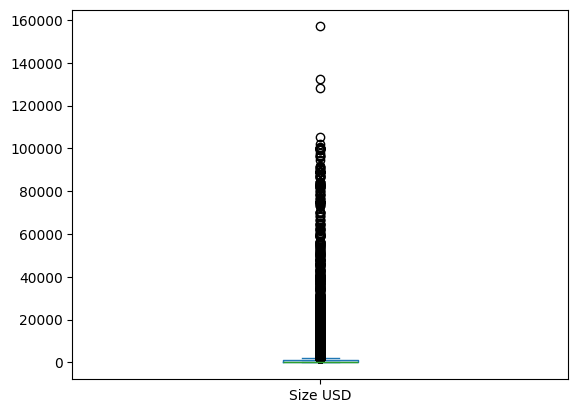

In [ ]:
trader['Size USD'].plot(kind='box')

In [ ]:
import pandas as pd

Q1 = trader['Size USD'].quantile(0.25)
Q3 = trader['Size USD'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
trader = trader[(trader['Size USD']>= lower_bound) & (trader['Size USD'] <= upper_bound)]


<Axes: >

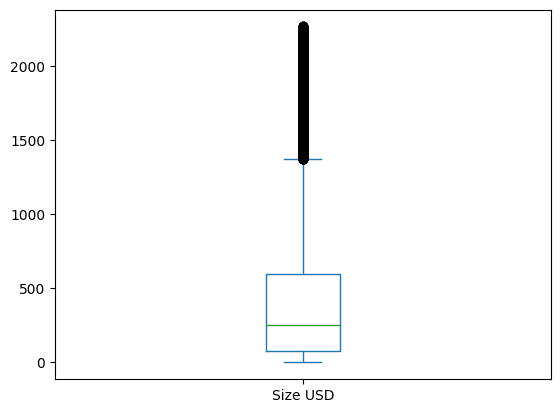

In [ ]:
trader['Size USD'].plot(kind='box')

In [ ]:
trader['Size USD'].describe()

,Size USD
count,98019.000000
mean,459.926485
std,521.466436
min,0.000000
25%,74.790000
50%,254.470000
75%,593.710000
max,2265.100000


# bivarilate analysis


In [ ]:
correlation = trader[['Size USD', 'Closed PnL']].corr()
print(correlation)


            Size USD  Closed PnL
Size USD    1.000000    0.031173
Closed PnL  0.031173    1.000000


##
 Correlation Coefficient: 0.11 (Low Positive Correlation)
   1.There’s a very weak positive relationship between trade size (sizeUSD) and profit/loss (closedPnL)
   2.In general, larger trades tend to make slightly higher profits, but the relationship is not strong or consistent.
       


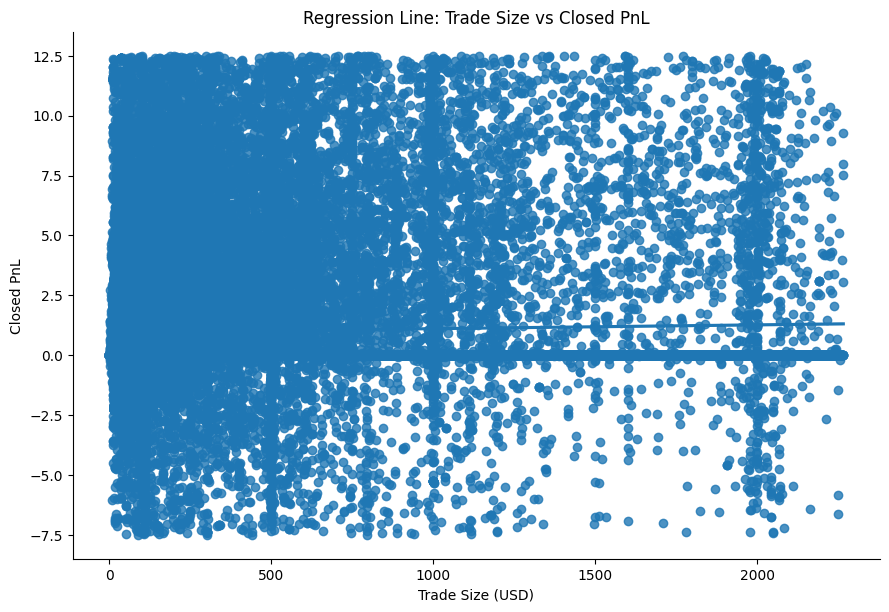

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(data=trader, x='Size USD', y='Closed PnL', height=6, aspect=1.5)
plt.title("Regression Line: Trade Size vs Closed PnL")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.show()


 Visual EDA & Insights:
1. High Density Around Low Trade Sizes:

Most trades are clustered below $500, indicating that a majority of trades are of smaller size.

Suggests a trading strategy with frequent small trades, possibly algorithmic or scalping.

2. PnL Spread is Wide:

Closed PnL varies greatly even for small trades (from ~-5 to +10), which implies high volatility in trade outcomes regardless of size.

3. No Strong Correlation:

The regression line is nearly flat, suggesting no strong linear relationship between trade size and PnL.

Larger trades don’t necessarily lead to higher or lower profits on average.

4. Some Large Losses in High Trade Sizes:

You can observe that even large trade sizes (~2000 USD) can result in negative PnL, hinting at risky large trades without proportionate gains.

5. Symmetric Distribution:

The PnL seems relatively symmetric around 0, suggesting roughly equal chances of profit and loss — or a well-hedged strategy.

6. Outliers:

Some extreme values (>10 or < -5) may need further investigation (e.g., incorrect logs or very risky trades).

# sentiment['classification'] vs trader['direction']

#

In [ ]:
import pandas as pd
pd.crosstab(sentiment['classification'],trader['Direction'])

Direction,Buy,Close Long,Close Short,Open Long,Open Short,Sell,Spot Dust Conversion
classification,,,,,,,
Extreme Fear,4,3,23,33,88,2,1
Extreme Greed,16,0,0,14,86,38,0
Fear,44,2,21,35,181,19,0
Greed,60,2,7,40,57,68,0
Neutral,45,5,7,2,76,27,0


Trader Behavior Patterns
1. High Fear Environment:
During periods of elevated fear, widespread selling typically occurs, leading to a downward market trend.

2. Increasing Greed:
As greed intensifies, there is a noticeable rise in buying activity and long positions, often resulting in an upward trend.

3. Extreme Greed Phase:
In times of extreme greed, there is a surge in selling and spot conversions, indicating traders are either exiting positions or hedging. This behavior often precedes market reversals or profit-taking events.

Strategy Interpretation Guidelines
1. Contrarian Strategy:
In scenarios of extreme fear, when the majority are selling, a contrarian trader may anticipate a reversal or technical bounce and position accordingly.

2. Trend-Following Strategy:
When greed is prevalent and buying pressure is increasing, a trend-following approach—trading with the prevailing momentum—can be effective.

3. Profit-Taking During Extreme Greed:
During phases of excessive optimism and increased spot conversions, profit booking becomes a prudent risk management decision, anticipating possible market pullbacks.

In [ ]:
import pandas as pd
pd.crosstab(sentiment['classification'],trader['Side'])

Side,BUY,SELL
classification,,
Extreme Fear,60,94
Extreme Greed,30,124
Fear,100,202
Greed,107,127
Neutral,54,108


1. Extreme Fear / Fear: Majority of traders are selling, indicating a downtrend or panic-driven market behavior.

2. Greed: Traders are primarily buying, suggesting optimism and an upward market trend.

3. Extreme Greed: High sell activity—traders are booking profits, which could indicate the market is peaking or may reverse soon.

4. Neutral: Both buying and selling are active, showing a lack of clear trend and likely a sideways or range-bound market.

In summary: Trader actions shift with sentiment—selling dominates during fear, buying during greed, and profit-taking during extreme greed.